In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Carregando o arquivo CSV
caminho_arquivo = r'C:\Users\mates\Downloads\desmatamento_prodes.csv'
df = pd.read_csv(caminho_arquivo)

# Visualizando as primeiras linhas do DataFrame
print(df.head())

   referencia  acre  amazonas  amapa  maranhao  mato_grosso  para  rondonia  \
0        1988   620      1510     60      2450         5140  6990      2340   
1        1989   540      1180    130      1420         5960  5750      1430   
2        1990   550       520    250      1100         4020  4890      1670   
3        1991   380       980    410       670         2840  3780      1110   
4        1992   400       799     36      1135         4674  3787      2265   

   roraima  tocantins  area_total_desmatamento  
0      290       1650                    21050  
1      630        730                    17770  
2      150        580                    13730  
3      420        440                    11030  
4      281        409                    13786  


In [4]:
# Informações gerais sobre o DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   referencia               35 non-null     int64
 1   acre                     35 non-null     int64
 2   amazonas                 35 non-null     int64
 3   amapa                    35 non-null     int64
 4   maranhao                 35 non-null     int64
 5   mato_grosso              35 non-null     int64
 6   para                     35 non-null     int64
 7   rondonia                 35 non-null     int64
 8   roraima                  35 non-null     int64
 9   tocantins                35 non-null     int64
 10  area_total_desmatamento  35 non-null     int64
dtypes: int64(11)
memory usage: 3.1 KB
None


In [5]:
# Estatísticas descritivas do DataFrame
print(df.describe())

        referencia         acre     amazonas       amapa     maranhao  \
count    35.000000    35.000000    35.000000   35.000000    35.000000   
mean   2005.000000   500.428571   954.200000   47.485714   753.857143   
std      10.246951   251.248329   547.907667   78.469691   502.825086   
min    1988.000000   167.000000   370.000000    0.000000   209.000000   
25%    1996.500000   307.000000   592.000000   13.000000   343.000000   
50%    2005.000000   441.000000   775.000000   25.000000   674.000000   
75%    2013.500000   606.000000  1154.500000   42.500000  1063.000000   
max    2022.000000  1208.000000  2607.000000  410.000000  2450.000000   

        mato_grosso         para     rondonia     roraima    tocantins  \
count     35.000000    35.000000    35.000000   35.000000    35.000000   
mean    4344.485714  4764.371429  1889.571429  261.400000   251.142857   
std     3074.753719  1771.290873  1000.094563  131.758514   319.975748   
min      757.000000  1741.000000   435.000000 

In [6]:
# Verificando a presença de dados faltantes
print(df.isnull().sum())

referencia                 0
acre                       0
amazonas                   0
amapa                      0
maranhao                   0
mato_grosso                0
para                       0
rondonia                   0
roraima                    0
tocantins                  0
area_total_desmatamento    0
dtype: int64


In [7]:
# Listando as colunas do DataFrame
print(df.columns)

Index(['referencia', 'acre', 'amazonas', 'amapa', 'maranhao', 'mato_grosso',
       'para', 'rondonia', 'roraima', 'tocantins', 'area_total_desmatamento'],
      dtype='object')


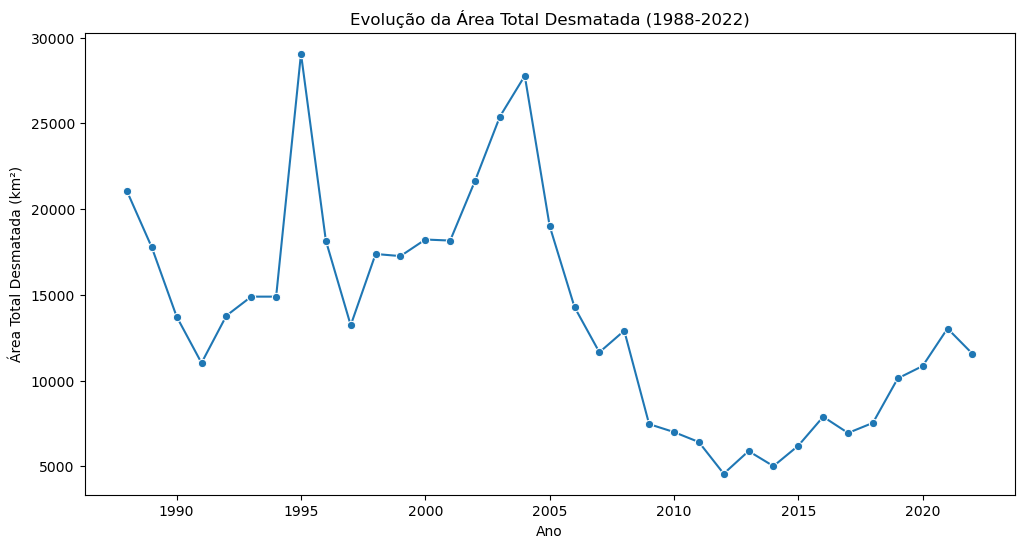

In [11]:
# Verificando se a coluna 'area_total_desmatamento' está presente
if 'area_total_desmatamento' in df.columns:
    # Gráfico da evolução da área total desmatada ao longo dos anos
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df, x='referencia', y='area_total_desmatamento', marker='o')
    plt.title('Evolução da Área Total Desmatada (1988-2022)')
    plt.xlabel('Ano')
    plt.ylabel('Área Total Desmatada (km²)')
    plt.show()
else:
    print("A coluna 'area_total_desmatamento' não está presente no DataFrame.")


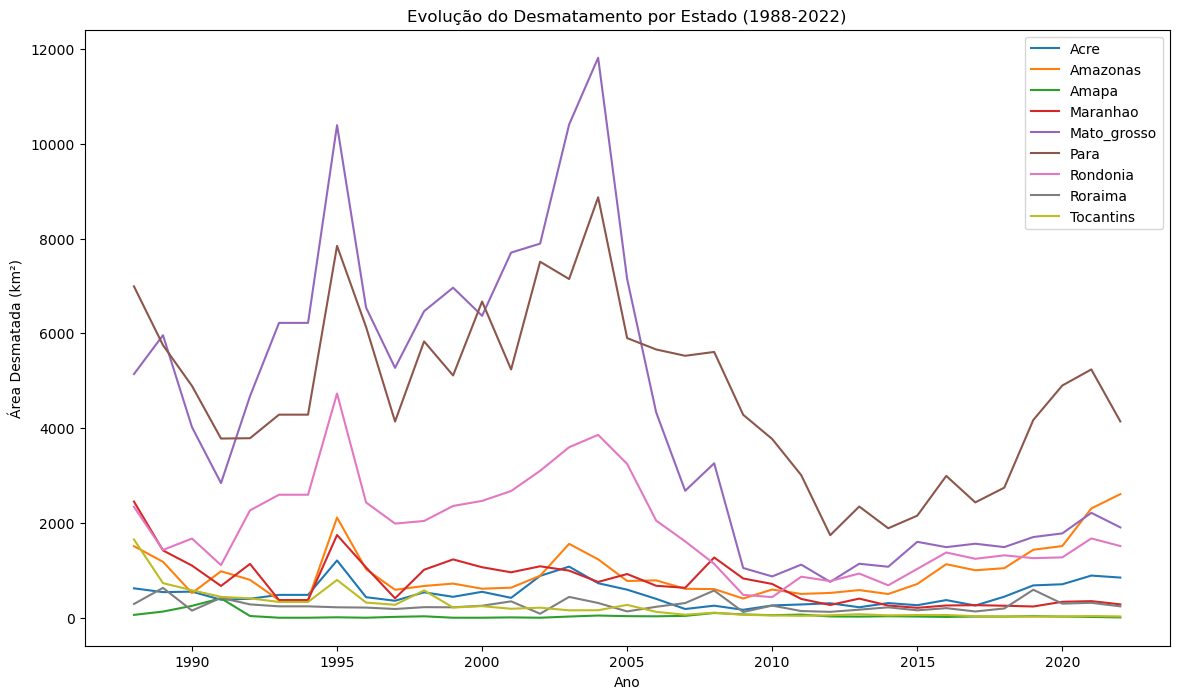

In [12]:
# Lista de estados
estados = ['acre', 'amazonas', 'amapa', 'maranhao', 'mato_grosso', 'para', 'rondonia', 'roraima', 'tocantins']

# Verificando se as colunas dos estados estão presentes
colunas_presentes = [estado for estado in estados if estado in df.columns]

# Gráfico da evolução do desmatamento por estado
plt.figure(figsize=(14,8))
for estado in colunas_presentes:
    sns.lineplot(data=df, x='referencia', y=estado, label=estado.capitalize())

plt.title('Evolução do Desmatamento por Estado (1988-2022)')
plt.xlabel('Ano')
plt.ylabel('Área Desmatada (km²)')
plt.legend()
plt.show()


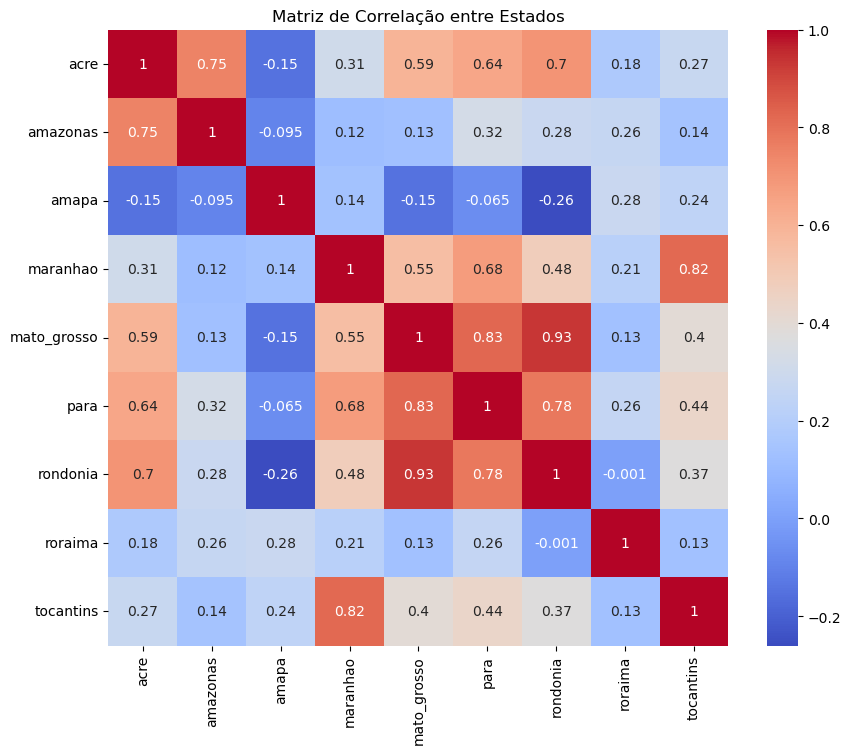

In [13]:
# Selecionando apenas as colunas dos estados
df_estados = df[colunas_presentes]

# Calculando a matriz de correlação
corr_matrix = df_estados.corr()

# Exibindo o heatmap da matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre Estados')
plt.show()


## Pré-processamento dos Dados

In [14]:
# Verificando se as colunas necessárias estão presentes
if all(col in df.columns for col in ['referencia'] + colunas_presentes + ['area_total_desmatamento']):
    # Variáveis independentes (X) e dependente (y)
    X = df[colunas_presentes]
    y = df['area_total_desmatamento']
else:
    print("Algumas colunas necessárias não estão presentes no DataFrame.")


In [15]:
from sklearn.model_selection import train_test_split

# Dividindo os dados (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Modelo Base

In [19]:
# Criando o modelo de Regressão Linear
modelo_lr = LinearRegression()

# Treinando o modelo
modelo_lr.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_lr = modelo_lr.predict(X_test)

# Avaliando o modelo
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('Desempenho do Modelo de Regressão Linear:')
print(f'MAE: {mae_lr:.2f}')
print(f'RMSE: {rmse_lr:.2f}')
print(f'R²: {r2_lr:.2f}')


Desempenho do Modelo de Regressão Linear:
MAE: 0.00
RMSE: 0.00
R²: 1.00


In [20]:
# Criando o modelo de Árvore de Decisão
modelo_dt = DecisionTreeRegressor(random_state=42)

# Treinando o modelo
modelo_dt.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_dt = modelo_dt.predict(X_test)

# Avaliando o modelo
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print('\nDesempenho do Modelo de Árvore de Decisão:')
print(f'MAE: {mae_dt:.2f}')
print(f'RMSE: {rmse_dt:.2f}')
print(f'R²: {r2_dt:.2f}')



Desempenho do Modelo de Árvore de Decisão:
MAE: 2083.55
RMSE: 2625.86
R²: 0.88


In [21]:
# Criando o modelo de Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
modelo_rf.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_rf = modelo_rf.predict(X_test)

# Avaliando o modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('\nDesempenho do Modelo de Random Forest:')
print(f'MAE: {mae_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'R²: {r2_rf:.2f}')



Desempenho do Modelo de Random Forest:
MAE: 1640.12
RMSE: 2294.24
R²: 0.91


In [22]:
# Criando um DataFrame para comparar as métricas
resultados = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Árvore de Decisão', 'Random Forest'],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf],
    'R²': [r2_lr, r2_dt, r2_rf]
})

print('\nComparação dos Modelos:')
print(resultados)



Comparação dos Modelos:
              Modelo           MAE          RMSE        R²
0   Regressão Linear  2.397759e-12  3.627629e-12  1.000000
1  Árvore de Decisão  2.083545e+03  2.625860e+03  0.881437
2      Random Forest  1.640119e+03  2.294237e+03  0.909493


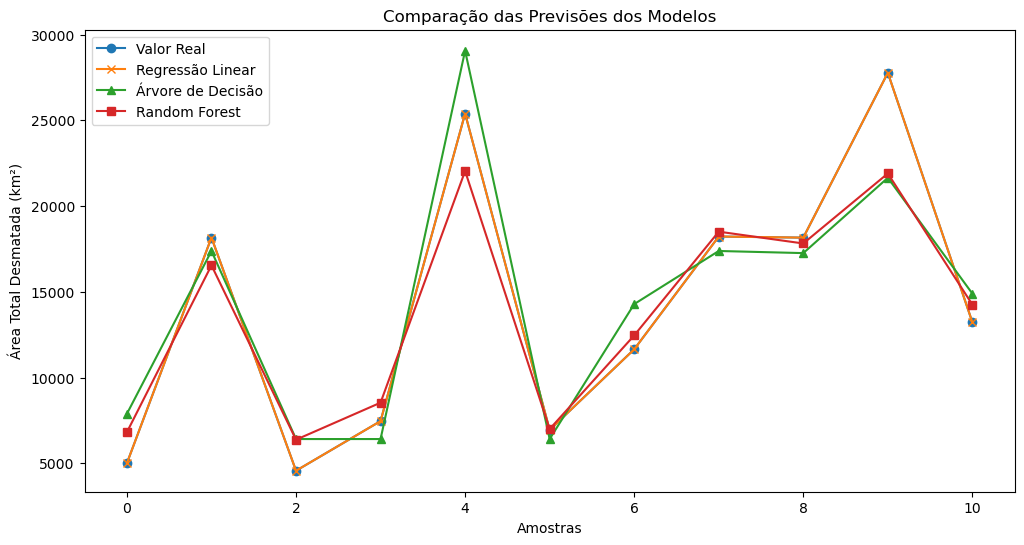

In [23]:
# Criando um DataFrame com as previsões e valores reais
df_resultados = pd.DataFrame({
    'Valor Real': y_test.reset_index(drop=True),
    'Regressão Linear': y_pred_lr,
    'Árvore de Decisão': y_pred_dt,
    'Random Forest': y_pred_rf
})

# Plotando os resultados
plt.figure(figsize=(12,6))
plt.plot(df_resultados['Valor Real'], label='Valor Real', marker='o')
plt.plot(df_resultados['Regressão Linear'], label='Regressão Linear', marker='x')
plt.plot(df_resultados['Árvore de Decisão'], label='Árvore de Decisão', marker='^')
plt.plot(df_resultados['Random Forest'], label='Random Forest', marker='s')
plt.title('Comparação das Previsões dos Modelos')
plt.xlabel('Amostras')
plt.ylabel('Área Total Desmatada (km²)')
plt.legend()
plt.show()
